# EDA- Retail

**Done By- Saptarsi Bhattacharjee**

**Aim:**
1. Find out the weak areas where you can work to make more profit
2. derive the business problems 

In [1]:
!pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 KB 30.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *


In [3]:
retail=pd.read_csv("/work/SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
retail.shape

(9994, 13)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Now let's see -Is there any duplicate data

In [7]:
retail.duplicated().sum()

17

In [8]:
retail.drop_duplicates(inplace=True)

In [9]:
retail.shape


(9977, 13)

Check for unique values.

In [10]:
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
retail1=retail.drop("Postal Code", axis=1)

Correlation btw variables

In [12]:
retail1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


Covariance of columns

In [13]:
retail1.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# Data Visualization

## Basic Analysis

Plotting correlation btw the variables using Heat map

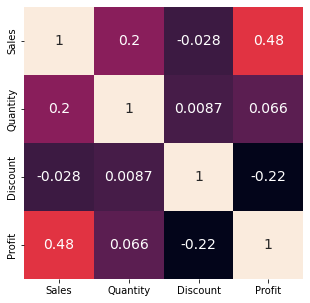

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(retail1.corr(),annot=True,cbar=False,annot_kws={"size":14})
plt.show()

In [15]:
retail1["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

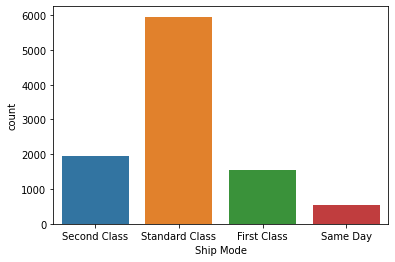

In [16]:
sns.countplot(x=retail1["Ship Mode"])

In [17]:
retail1["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

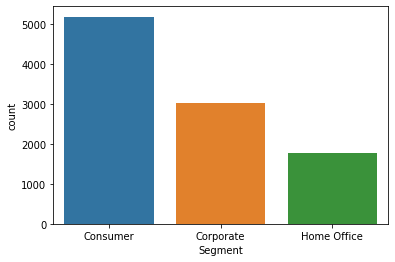

In [18]:
sns.countplot(x=retail1["Segment"])

<AxesSubplot:xlabel='Category', ylabel='count'>

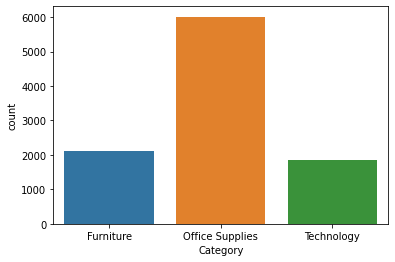

In [19]:
sns.countplot(x=retail["Category"])

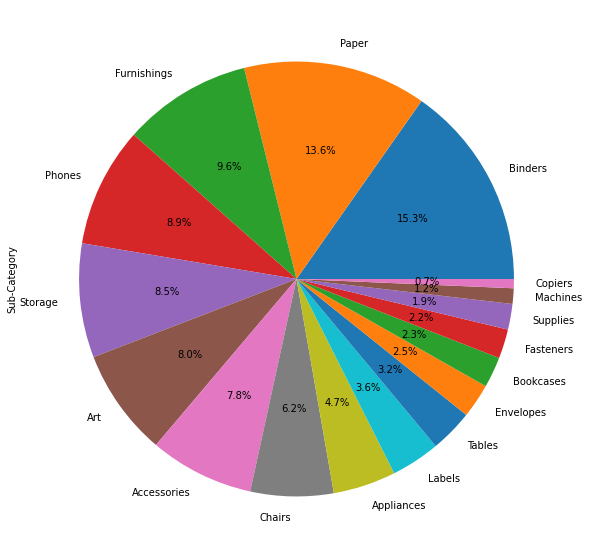

In [20]:
plt.figure(figsize=(10,10))
retail1["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [21]:
retail["State"].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

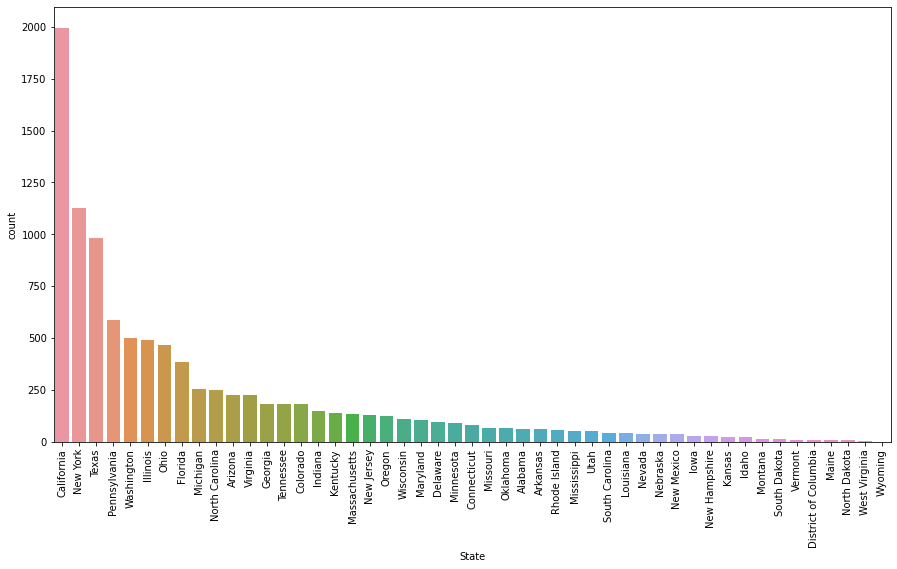

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x=retail1["State"],order=retail1["State"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

So, highest no of buyers are from California and New York.

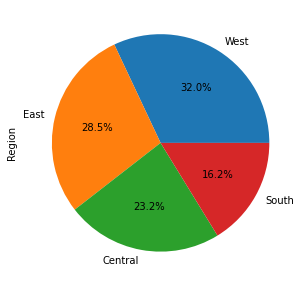

In [23]:
plt.figure(figsize=(5,5))
retail1["Region"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

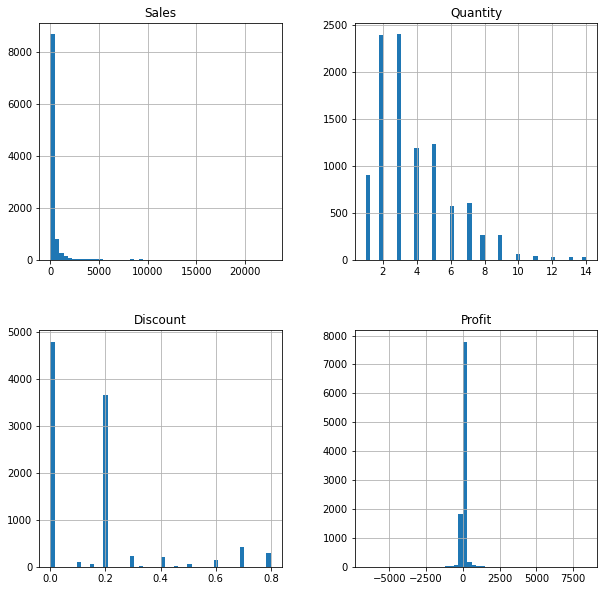

In [24]:
retail1.hist(bins=50,figsize=(10,10))
plt.show()

We can say that most buyers tends to buy quantity of 2 and 3. And  maximum given discount is 0 to 20 %. 

<Figure size 1080x432 with 0 Axes>

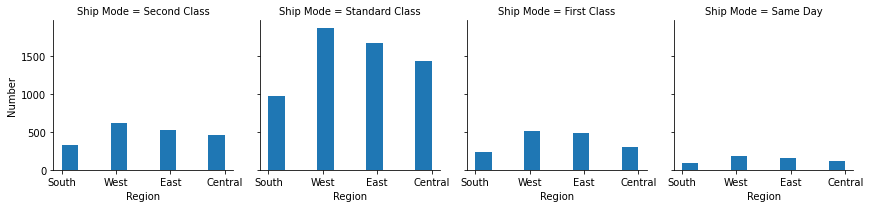

In [25]:
plt.figure(figsize=(15,6))
region_hist=sns.FacetGrid(retail1, col="Ship Mode",palette="rainbow")
region_hist.map(plt.hist, "Region")
region_hist.set_ylabels("Number")

<Figure size 1080x432 with 0 Axes>

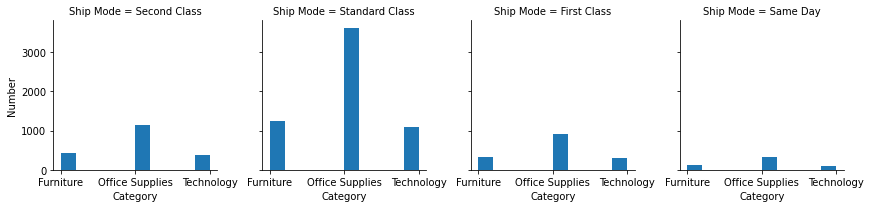

In [26]:
plt.figure(figsize=(15,6))
category_hist=sns.FacetGrid(retail1, col="Ship Mode",palette="rainbow")
category_hist.map(plt.hist, "Category")
category_hist.set_ylabels("Number")

## Sales Summery

Boxplot of Region vs sales:

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


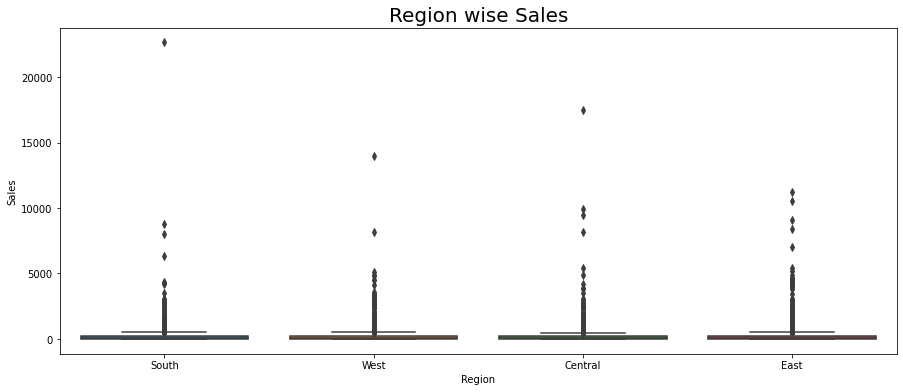

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot("Region","Sales", data= retail1)
plt.title("Region wise Sales", fontsize=20)
plt.show()

Distribution&nbsp;plot&nbsp;of&nbsp;Sales:

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Sales', ylabel='Density'>

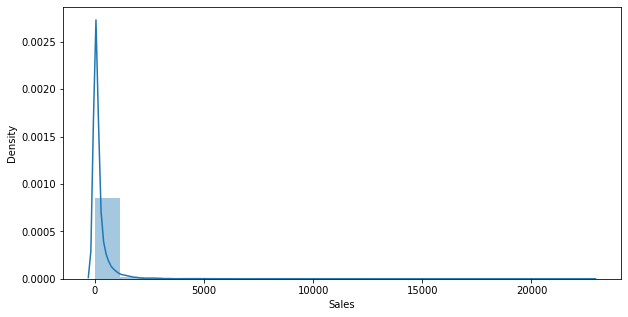

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(retail1["Sales"],bins=20)

Bar plot btw State and Sale:

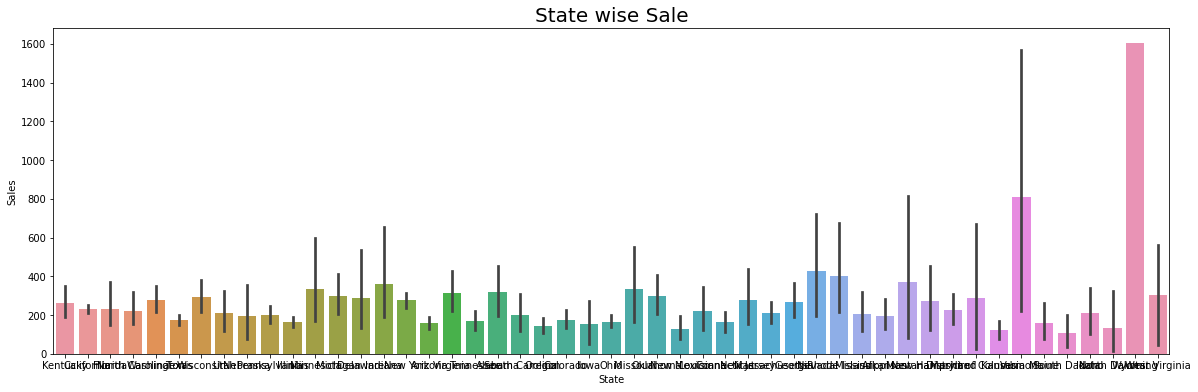

In [29]:
plt.figure(figsize=(20,6))
sns.barplot(x="State",y="Sales",data=retail1)
plt.title("State wise Sale",fontsize=20)
plt.show()

Regression plot btw Profit and Sale:

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


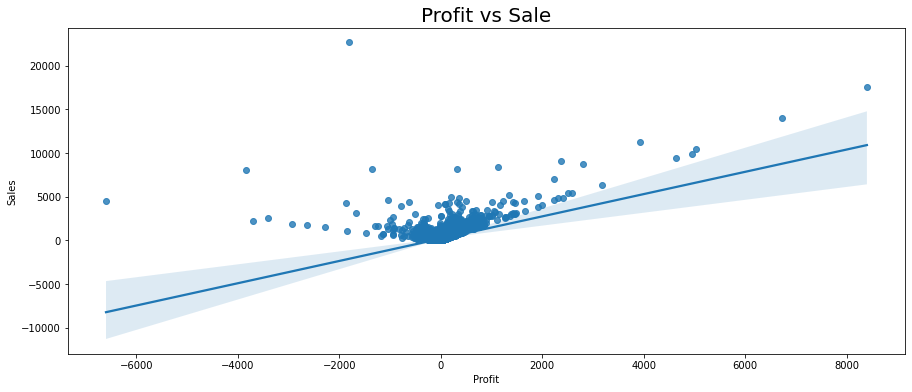

In [30]:
plt.figure(figsize=(15,6))
sns.regplot("Profit","Sales", data=retail1)
plt.title("Profit vs Sale", fontsize=20)
plt.show()

Summery of Sales:

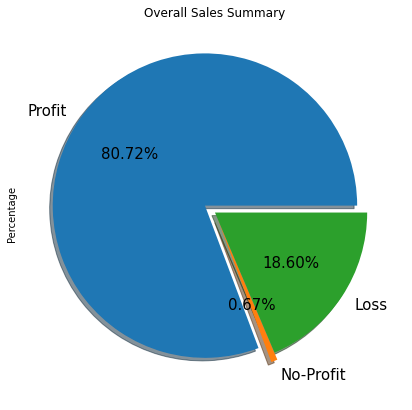

In [31]:
summary=pd.DataFrame(
    {"Profit": retail1.Quantity[retail1.Profit>0].sum(),
    "No-Profit": retail1.Quantity[retail1.Profit==0].sum(),
    "Loss": retail1.Quantity[retail1.Profit<0].sum()
    }, index={"Count"}
).T
summary.Count.plot.pie(autopct="%1.2f%%",figsize=(7,7),
                       label="Percentage",textprops={"fontsize":15},
                       shadow=True,explode=(0.08,0.05,0))
plt.title("Overall Sales Summary")
plt.show()

## Profit Analysis :

<AxesSubplot:title={'center':'Region'}, ylabel='Profit'>

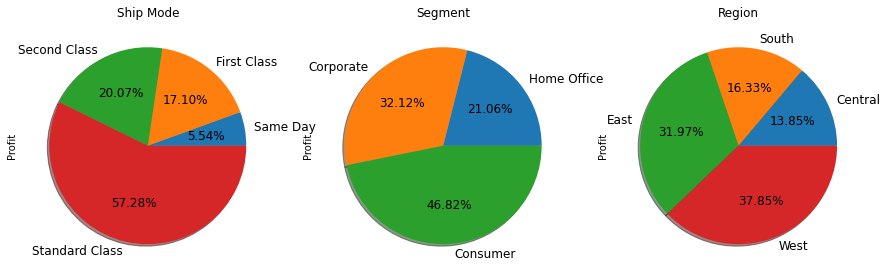

In [32]:
profit_shipmode=pd.DataFrame(retail1.groupby("Ship Mode").sum()).sort_values("Profit")
profit_segment=pd.DataFrame(retail1.groupby("Segment").sum()).sort_values("Profit")
profit_region=pd.DataFrame(retail1.groupby("Region").sum()).sort_values("Profit")

fig,ax=plt.subplots(1,3, figsize=(15,6))
ax[0].set_title( "Ship Mode", fontsize=12)
ax[1].set_title( "Segment", fontsize=12)
ax[2].set_title( "Region", fontsize=12)


profit_shipmode.Profit.plot.pie(autopct="%1.2f%%" ,textprops={"fontsize":12},
                       shadow=True,ax=ax[0])
profit_segment.Profit.plot.pie(autopct="%1.2f%%", textprops={"fontsize":12},
                       shadow=True,ax=ax[1])
profit_region.Profit.plot.pie(autopct="%1.2f%%",textprops={"fontsize":12},
                       shadow=True,ax=ax[2])

Here we can see that in the shipmode, standard class shows highest profit. Similarly, consumer and west region shows the highest profit.

Now, analyze category wise profit.

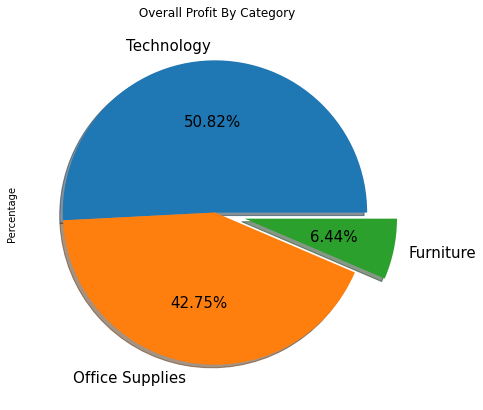

In [33]:
category= np.round(retail1.groupby("Category").sum(),decimals=2).sort_values("Profit",ascending=False)
plt.title(" Overall Profit By Category")
category.Profit.plot.pie(autopct="%1.2f%%",figsize=(7,7),
                       label="Percentage",textprops={"fontsize":15},
                       shadow=True,explode=(0,0,0.2))
plt.show()

so, technology gives highest profit.

/root/venv/lib/python3.9/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
/root/venv/lib/python3.9/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


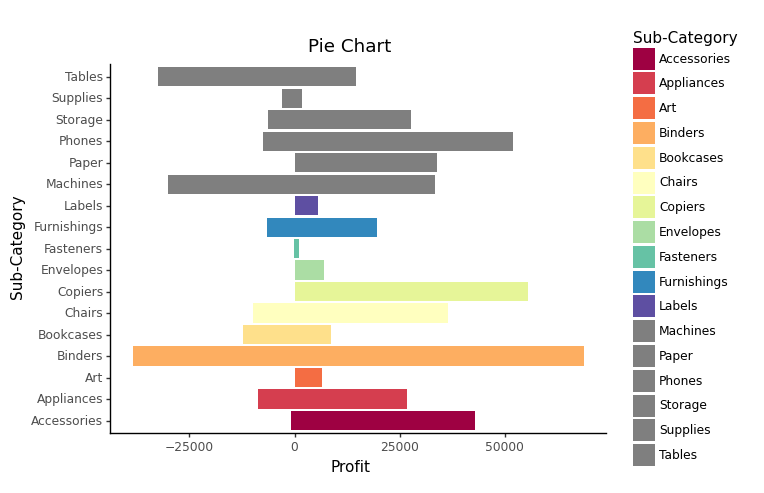

<ggplot: (8732288517964)>

In [34]:
profit_plot=(ggplot(retail1,aes(x="Sub-Category",y='Profit',fill="Sub-Category"))+ geom_col() + coord_flip() + scale_fill_brewer(type="div", palette="Spectral") + theme_classic()+ ggtitle("Pie Chart"))
display(profit_plot)

Here we can see that "Accessories" generates only profit, no loss.  "Binders" generate highest amount of loss as well as highest profit.

**Statewise Analysis on sales loss :**

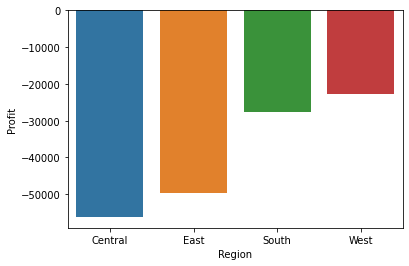

In [35]:
loss= np.round(retail1[(retail1.Profit)<0],decimals=2).sort_values("Profit")

# Sales loss in each region
region_loss=loss.groupby("Region").sum()

sns.barplot(x=region_loss.index, y=region_loss.Profit)
plt.show()

In [36]:
#State with sales loss in each region

print(f'CENTRAL\t:{loss[loss.Region=="Central"].State.unique().tolist()}')
print(f'SOUTH\t:{loss[loss.Region=="South"].State.unique().tolist()}')
print(f'WEST\t:{loss[loss.Region=="West"].State.unique().tolist()}')
print(f'EAST\t:{loss[loss.Region=="East"].State.unique().tolist()}')

CENTRAL	:['Texas', 'Illinois']
SOUTH	:['North Carolina', 'Florida', 'Tennessee']
WEST	:['Colorado', 'Arizona', 'Oregon', 'California', 'Nevada', 'Washington', 'New Mexico']
EAST	:['Ohio', 'Pennsylvania', 'New York', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'West Virginia', 'Delaware', 'Maryland', 'New Jersey', 'Connecticut']


here we show the states which generate huge loss along with regions.

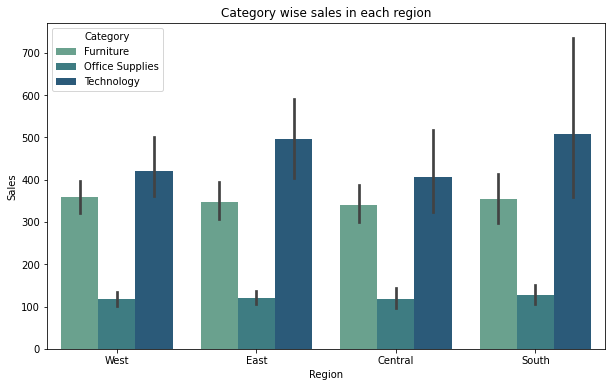

In [37]:
# Category wise sales in each region

plt.figure(figsize=(10,6))
plt.title("Category wise sales in each region")
plt.xlabel("Region")

sns.barplot(x="Region", y="Sales",data=retail1, hue="Category",order=retail1["Region"].value_counts().index, palette="crest")
plt.show()

Total Dealing for each sub-category :

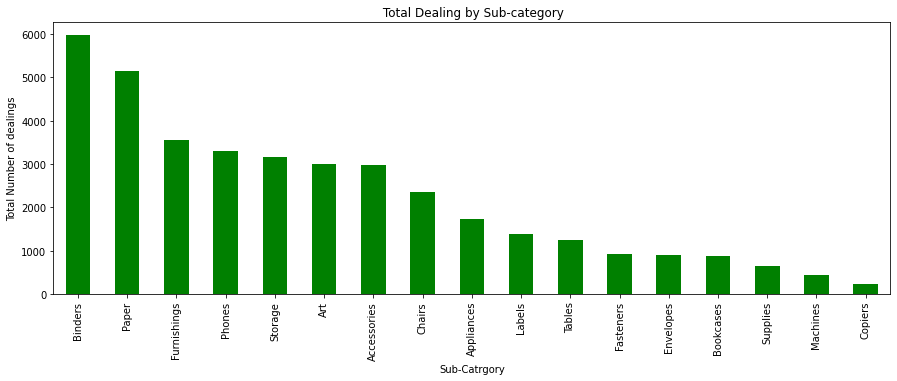

In [38]:
df_dealing=retail1.groupby("Sub-Category")["Quantity"].sum().sort_values(ascending= False).plot.bar(figsize=(15,5),color="green")
plt.ylabel("Total Number of dealings")
plt.xlabel("Sub-Catrgory")
plt.title(" Total Dealing by Sub-category")
plt.show()

Region wise profit and sale:

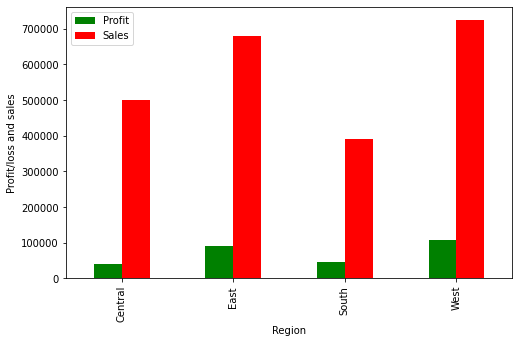

In [39]:
retail1.groupby("Region")[["Profit","Sales"]].sum().plot.bar(color=["green","red"],figsize=(8,5))
plt.ylabel("Profit/loss and sales")
plt.show()

so, profit nad sale is maximum in west region and minimum in south region.

Now, lets see the relationship among sales, prpfit and discount.

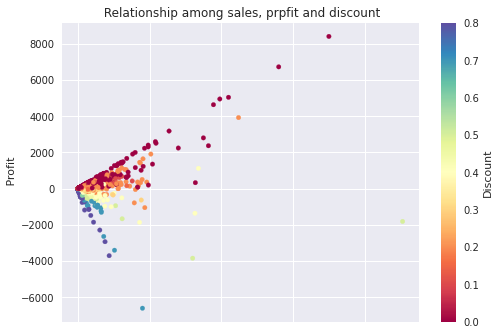

In [40]:
plt.style.use("seaborn")
retail1.plot(kind="scatter",x="Sales", y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel(" Profit")
plt.title(" Relationship among sales, prpfit and discount")
plt.show()

**Analysis on Discount and Quantity with Profit :**

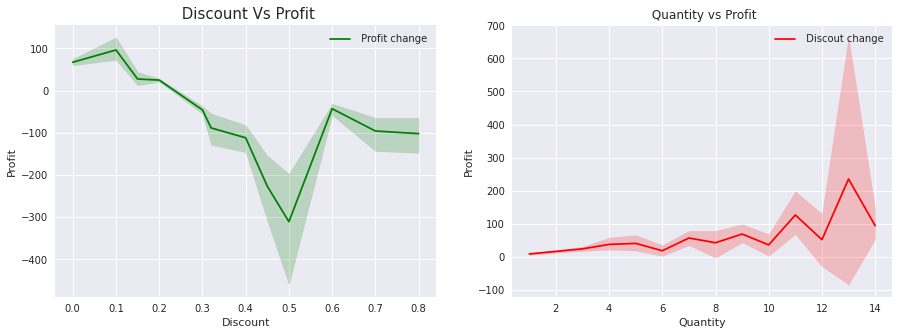

In [41]:
fig, ax=plt.subplots(1,2, figsize=(15,5))
ax[0].set_title(" Discount Vs Profit", fontsize=15)
ax[1].set_title (" Quantity vs Profit")

sns.lineplot (x=retail1.Discount, y=retail1.Profit, color="green", label=" Profit change", ax=ax[0])
sns.lineplot (x=retail1.Quantity, y=retail1.Profit, color="red", label=" Discout change", ax=ax[1])

plt.show()

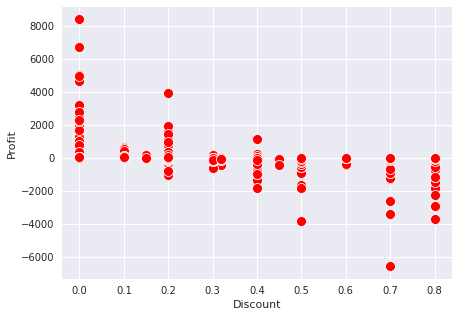

In [42]:
# Plotting profit change with Discount

plt.figure(figsize=(7,5))
sns.scatterplot(x=retail1.Discount, y=retail1.Profit, s=100, color="red")
plt.show()

**Profit/loss and sales across the states**

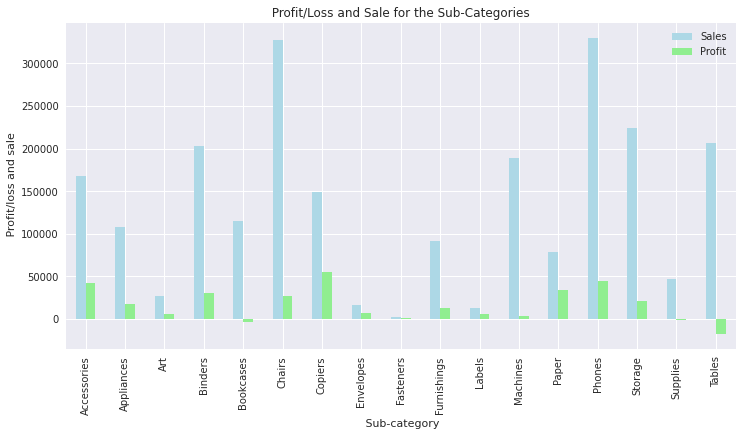

In [43]:
profit_sales_loss=retail.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by="Sub-Category",ascending=True)
profit_sales_loss[:].plot.bar(color=["lightblue", "lightgreen"], figsize=(12,6))

plt.title(" Profit/Loss and Sale for the Sub-Categories ")
plt.xlabel(" Sub-category")
plt.ylabel(" Profit/loss and sale")
plt.show()

So, Phone and Chairs generate huge amount of profit.But Table generates highest amount of loss.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c84d2d3e-3ad6-4099-b53d-434bf828b1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>